# Calculate the time depth of IBD 
Assuming constant Ne

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec
import socket
import os as os
import sys as sys
import multiprocessing as mp
import matplotlib.colors as cls
import h5py   # For Processing HDF5s

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)
rcParams['axes.linewidth'] = 0.2  # Set the Default Size of the Boundary for small 2.25in width figures

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
elif socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

sys.path.append("./package/")
from hapsburg.PackagesSupport.roh_expectations import Expected_Roh

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

compute-a-16-132.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/HAPSBURG
CPU Count: 32


In [43]:
def get_time_bands(fracs=[], N=2000, t_vec = np.linspace(1,200,200),
                   bl_lengths=np.linspace(0.04, 0.2, 20)):
    """Get Time Bands for when block sharing originates from.
    Return array of time depths [#blocks, #fracs]"""
    e_roh = Expected_Roh()  # The object to calculate the expected IBD sharing
    y = np.array([e_roh.roh_pdf_allchr_t_N(bl, t=t_vec, N=N) for bl in bl_lengths])
    yc = np.cumsum(y, axis=1)
    m = yc[:,-1]
    i_m = np.argmax(y, axis=1)
    tm = t_vec[i_m]

    t_bands= np.zeros((len(bl_lengths), len(fracs)))
    for i in range(len(bl_lengths)):
        idx_ts = np.searchsorted(yc[i,:], fracs * m[i])
        t_bands[i,:]= t_vec[idx_ts]
    return t_bands

def plot_timebands(bl_lengths, t_bands, figsize=(5,3), gen_time=28,
                   ylim=[0,60], xlim=[4,18],
                   cs = ["black", "darkgray", "gainsboro"], fs_big=16, fs_l=12,
                   legend=False, frameon=False, xlabel="Block Length [cm]",
                   dpi=600, yscale="", savepath=""):
    """Plot Time Bands.
    Input: Block Lengths and Time Bands when ROH originates from"""
    
    plt.figure(figsize=figsize)
    ax = plt.gca()
    bl_cm = bl_lengths*100
    #ax.plot(bl_lengths*100, tm, c="green", lw=2, label="Highest Density")
    ax.plot(bl_cm, t_bands[:,2], c=cs[0], lw=2, label="50%",zorder=3)
    ax.fill_between(bl_cm, t_bands[:,1], t_bands[:,3], color=cs[1], zorder=2, label="25-75%")
    ax.fill_between(bl_cm, t_bands[:,0], t_bands[:,4], color=cs[2], zorder=1, label="10-90%")
    ax.set_ylabel("Generations Ago", fontsize=fs_big)
    ax.set_xlabel(xlabel, fontsize=fs_big)
    if legend:
        ax.legend(title="Time Shared Haplotypes", loc="upper right", 
                  fontsize=fs_l, frameon=frameon)
    ax.set_ylim(ylim)
    if len(yscale)>0:
        ax.set_yscale(yscale)
    
    ax.set_xlim(xlim)
    
    ### Make a second axis
    if gen_time>0:
        ax2 = ax.twinx()
        ax2.set_ylabel("Years Ago [BP]", labelpad=fs_big, fontsize=fs_big, rotation=270)
        lbls = (ax.yaxis.get_ticklocs() * gen_time).astype("int")
        ax2.set_yticklabels(lbls)
        
    ### Save the data
    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=dpi)
        print(f"Saved to {savepath}")
    plt.show()

In [45]:
bl_lengths=np.linspace(0.04, 0.3, 100)

In [46]:
t_bands = get_time_bands(bl_lengths=bl_lengths,
                         t_vec = np.linspace(1,200,1000), N=2000,
                         fracs = np.array([0.1, 0.25,0.5,0.75, 0.9]))

/tmp/ipykernel_958/4138683956.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(lbls)


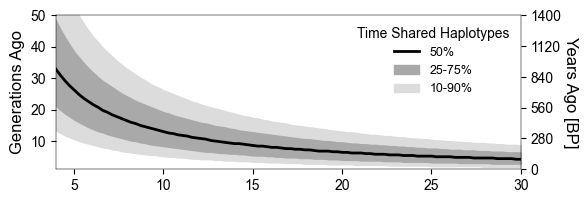

In [49]:
plot_timebands(bl_lengths, t_bands, gen_time=28,
               ylim=[1,50], xlim=[4,30], 
               xlabel="", fs_big=12, fs_l=9,
               legend=True, figsize=(6,2), yscale="",
               savepath="")

# 2) Calculate IBD sharing timing band for 16 cm [Number given in Paper]

In [39]:
get_time_bands(fracs=np.array([0.025,0.5,0.95,0.975, 0.99]), 
               N=200, t_vec = np.linspace(1,200,1000),
               bl_lengths=np.array([0.16,0.2]))

array([[ 1.7967968 ,  7.97197197, 19.12712713, 21.91591592, 25.5015015 ],
       [ 1.5975976 ,  6.37837838, 15.34234234, 17.53353353, 20.52152152]])

In [50]:
get_time_bands(fracs=np.array([0.025,0.5,0.95,0.975, 0.99]), 
               N=2000, t_vec = np.linspace(1,200,1000),
               bl_lengths=np.array([0.16,0.2, 0.25, 0.3]))

array([[ 1.7967968 ,  7.97197197, 19.32632633, 22.31431431, 25.8998999 ],
       [ 1.5975976 ,  6.37837838, 15.34234234, 17.73273273, 20.72072072],
       [ 1.1991992 ,  5.18318318, 12.35435435, 14.14714715, 16.53753754],
       [ 1.1991992 ,  4.18718719, 10.16316316, 11.75675676, 13.74874875]])

In [41]:
get_time_bands(fracs=np.array([0.025,0.5,0.95,0.975, 0.99]), 
               N=20000, t_vec = np.linspace(1,200,1000),
               bl_lengths=np.array([0.16,0.2]))

array([[ 1.7967968 ,  8.17117117, 19.32632633, 22.31431431, 25.8998999 ],
       [ 1.5975976 ,  6.37837838, 15.54154154, 17.73273273, 20.72072072]])